# **Aplicações Práticas com Python**

**prof: Sergio Assuncao Monteiro, DSc**


*   **linkedin:** https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

*   **lattes:** http://lattes.cnpq.br/9489191035734025
*   **github:** https://github.com/sergiomonteiro76


# **Instalação dos Pacotes**

In [ ]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir --upgrade pandas requests

# **Importação dos Pacotes**

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código

# **Baixar Dados Reais**

In [ ]:
#dados_series = yf.download("PETR4.SA", start="2023-01-01", end="2024-05-10")
df = yf.download("BBAS3.SA", start="2023-01-01", end="2024-05-10")

[*********************100%%**********************]  1 of 1 completed


# **Visualização Básica dos Dados**

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,17.110001,17.110001,16.450001,16.629999,13.841671,23557000
2023-01-03,16.629999,16.700001,16.209999,16.320000,13.583647,21547400
2023-01-04,16.415001,16.629999,16.280001,16.530001,13.758438,19519000
2023-01-05,16.645000,17.370001,16.540001,17.285000,14.386847,33937600
2023-01-06,17.325001,17.635000,17.219999,17.525000,14.586607,29504600
...,...,...,...,...,...,...
2024-05-03,28.020000,28.360001,27.900000,28.219999,28.219999,17315600
2024-05-06,28.299999,28.440001,28.160000,28.379999,28.379999,10006000
2024-05-07,28.480000,28.660000,28.290001,28.290001,28.290001,12606600


# **Visualização da Série Temporal**

In [ ]:
import pandas as pd
import plotly.express as px

# Suponha que o DataFrame df já esteja definido e a coluna de datas é o índice
# df = pd.DataFrame({'Close': closes}, index=dates)

# Resetar o índice para usar como coluna em Plotly
df.reset_index(inplace=True)

# Renomear a coluna do índice para 'Date'
df.rename(columns={'index': 'Date'}, inplace=True)

# Criar o gráfico de linha interativo
fig = px.line(df, x='Date', y='Close', title='Série Temporal dos Valores de Fechamento',
              labels={'Date': 'Data', 'Close': 'Valor de Fechamento'})

# Atualizar layout para melhorar a estética
fig.update_layout(title_font_size=20, title_x=0.5,
                  xaxis_title_font_size=16, yaxis_title_font_size=16,
                  template='plotly_white')

# Exibir o gráfico
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# **Histograma dos Dados**

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Exemplo de criação do DataFrame (comente/descomente conforme necessário)
# dates = pd.date_range(start='2022-01-01', periods=100, freq='D')
# closes = np.random.rand(100) * 100
# df = pd.DataFrame({'Close': closes}, index=dates)

# Gerar o histograma
fig = px.histogram(df, x="Close", nbins=20, title="Histograma dos Valores de Fechamento",
                   labels={"Close": "Valor de Fechamento"},
                   color_discrete_sequence=px.colors.qualitative.Set3)  # Definindo uma paleta de cores diferente

# Atualizar layout para melhorar a estética
fig.update_layout(title_font_size=20, title_x=0.5,
                  xaxis_title_font_size=16, yaxis_title_font_size=16,
                  template='plotly_white')

# Exibir o gráfico
fig.show()


# **Análise de Oportunidades**

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.9 MB/s eta 0:00:00


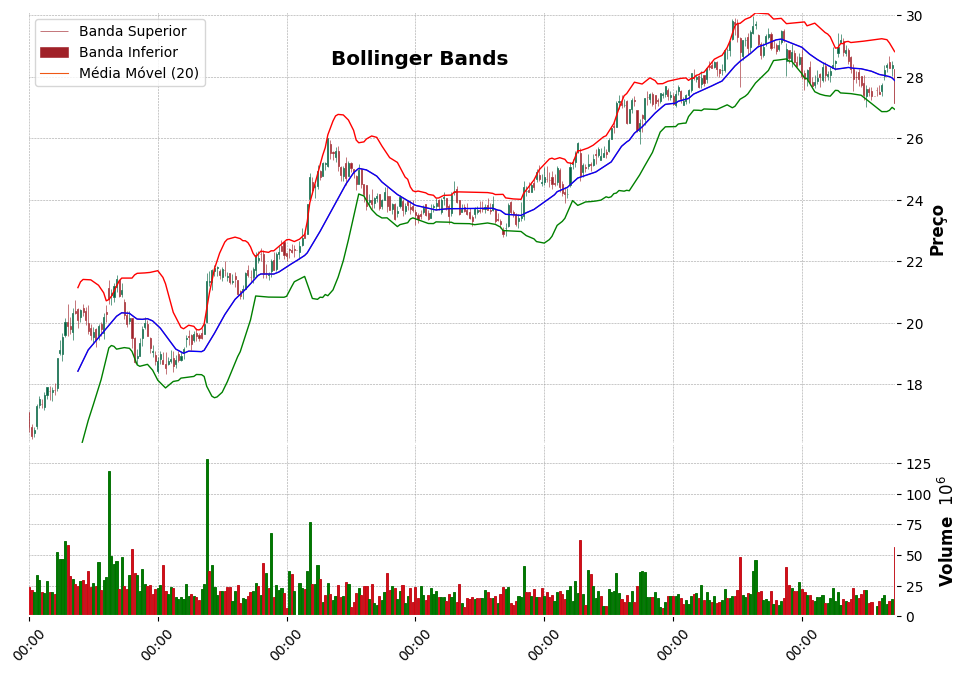

In [ ]:
import pandas as pd
import mplfinance as mpf

# Exemplo de criação do DataFrame (comente/descomente conforme necessário)
# dates = pd.date_range(start='2022-01-01', periods=100, freq='D')
# closes = np.random.rand(100) * 100
# df = pd.DataFrame({'Close': closes}, index=dates)

# Garantir que o índice seja do tipo DatetimeIndex
df.index = pd.to_datetime(df.index)

# Calcular as bandas de Bollinger (média móvel de 20 períodos e desvio padrão de 2)
df['20MA'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['20MA'] + 2 * df['Close'].rolling(window=20).std()
df['Lower'] = df['20MA'] - 2 * df['Close'].rolling(window=20).std()

# Criar o gráfico de Bollinger Bands
fig, axlist = mpf.plot(df, type='candle', mav=(20,), volume=True, ylabel='Preço',
                        title='Bollinger Bands', tight_layout=True, style='charles', figsize=(10, 7),
                        addplot=[
                            mpf.make_addplot(df['Upper'], color='red', width=1, panel=0),
                            mpf.make_addplot(df['Lower'], color='green', width=1, panel=0),
                            mpf.make_addplot(df['20MA'], color='blue', width=1, panel=0)
                        ],
                        figscale=1.5,
                        returnfig=True
                        )

# Adicionar legendas
axlist[0].legend(['Banda Superior', 'Banda Inferior', 'Média Móvel (20)'])

# Exibir o gráfico
mpf.show()


# **Conclusões**

## **Significado de cada componente do gráfico e como um investidor pode utilizá-lo:**

1. **Candlestick (velas)**:
   - As velas mostram a variação dos preços ao longo do tempo. Cada vela representa um período de tempo específico (por exemplo, um dia).
   - Uma vela consiste em um corpo e duas sombras (ou pavios). O corpo representa a diferença entre o preço de abertura e o preço de fechamento durante o período. As sombras indicam os preços mais altos e mais baixos atingidos durante o período.

2. **Média Móvel (20 períodos)**:
   - A linha azul representa a média móvel de 20 períodos do preço de fechamento.
   - A média móvel é usada para suavizar as flutuações dos preços e identificar a direção da tendência.

3. **Bollinger Bands (bandas de Bollinger)**:
   - As bandas de Bollinger são duas linhas (banda superior e banda inferior) que são plotadas acima e abaixo da média móvel.
   - A banda superior é calculada adicionando duas vezes o desvio padrão da média móvel ao preço médio.
   - A banda inferior é calculada subtraindo duas vezes o desvio padrão da média móvel ao preço médio.
   - As bandas de Bollinger expandem e contraem com base na volatilidade do mercado. Quando o mercado está volátil, as bandas se afastam da média móvel. Quando o mercado está calmo, as bandas se aproximam da média móvel.

##**Como utilizar o gráfico**

- **Comprar Sinal**: Um sinal de compra é gerado quando o preço está próximo ou abaixo da banda inferior e começa a subir. Isso sugere que o preço pode estar sobrevendido e pode haver uma oportunidade de compra.
  
- **Vender Sinal**: Um sinal de venda é gerado quando o preço está próximo ou acima da banda superior e começa a cair. Isso sugere que o preço pode estar sobrecomprado e pode haver uma oportunidade de venda.

- **Esperar (Nada)**: Em períodos de baixa volatilidade, quando as bandas estão estreitas, pode ser prudente esperar por uma quebra significativa antes de tomar uma decisão de compra ou venda.


##**Observações**

É importante lembrar que os indicadores técnicos, como as Bollinger Bands, são ferramentas auxiliares e devem ser usados em conjunto com outras análises, como análise fundamentalista e sentimento do mercado. Além disso, nenhum indicador é infalível e sempre há riscos associados ao investimento no mercado financeiro.